In [1]:
# Libraries
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import urllib
import urllib2
import re
import unicodedata
import datetime
import requests
import requests_cache
requests_cache.install_cache('demo_cache')
%matplotlib inline

In [2]:
# Helper function--time string to seconds int
def time_to_sec(time):
    time_list = time.split(':')
    return int(time_list[0]) * 60 + int(time_list[1])

## Scrape season totals statistics for each team, 1986-2017

In [3]:
link = 'https://www.basketball-reference.com/leagues/NBA_2017_totals.html'
page = urllib.urlopen(link).read()
soup = BeautifulSoup(page, "lxml")

In [4]:
yr = link[49:53]
yr

'2017'

In [5]:
tabs = soup.findAll('table')
table = tabs[0]

In [6]:
rows = table.findAll('tr')

In [7]:
rows

[<tr>\n<th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>\n<th aria-label="Player" class=" poptip sort_default_asc center" data-stat="player" scope="col">Player</th>\n<th aria-label="Position" class=" poptip sort_default_asc center" data-stat="pos" data-tip="Position" scope="col">Pos</th>\n<th aria-label="Age of Player at the start of February 1st of that season." class=" poptip sort_default_asc center" data-stat="age" data-tip="Age of Player at the start of February 1st of that season." scope="col">Age</th>\n<th aria-label="Team" class=" poptip sort_default_asc center" data-stat="team_id" data-tip="Team" scope="col">Tm</th>\n<th aria-label="Games" class=" poptip center" data-stat="g" data-tip="Games" scope="col">G</th>\n<th aria-label="Games Started" class=" poptip center" data-stat="gs" data-tip="Games Started" scope="col">GS</th>\n<th aria-label="Minutes Played" class=" poptip center" d

In [8]:
def scrape_season_data(link):
    page = urllib.urlopen(link).read()
    soup = BeautifulSoup(page, "lxml")
    
    yr = link[49:53]
    tabs = soup.findAll('table')
    table = tabs[0]
    rows = table.findAll('tr')
    
    season_log = pd.DataFrame()
    for row in rows:
        if len(row) == 30:
            tds = row.findAll('td')
            #print tds[0]
            info = row.findAll('a')[0]
            player = info.text
            #print player
            player_id = info.get('href')[11:20]
            #print player_id
            #print tds[28].text
            season_log = season_log.append({'player': player,
                                            'yr': int(link[49:53]),
                                            'id': player_id,
                                            'pos': tds[1].text,
                                            'age': tds[2].text,
                                            'team': tds[3].text,
                                            'G': tds[4].text,
                                            'GS': tds[5].text,
                                            'mp': tds[6].text,
                                            #'secs': time_to_sec(tds[6].text),
                                            'fg': int(tds[7].text),
                                            'fga': int(tds[8].text),
                                            'fg_pct': tds[9].text,
                                            'fg3': int(tds[10].text),
                                            'fg3a': int(tds[11].text),
                                            'fg3_pct': tds[12].text,
                                            'fg2': int(tds[13].text),
                                            'fg2a': int(tds[14].text),
                                            'fg2_pct': tds[15].text,
                                            'efg': tds[16].text,
                                            'ft': int(tds[17].text),
                                            'fta': int(tds[18].text),
                                            'ft_pct': tds[19].text,
                                            'orb': int(tds[20].text),
                                            'drb': int(tds[21].text),
                                            'trb': int(tds[22].text),
                                            'ast': int(tds[23].text),
                                            'stl': int(tds[24].text),
                                            'blk': int(tds[25].text),
                                            'tov': int(tds[26].text),
                                            'pf': int(tds[27].text),
                                            'pts': int(tds[28].text)},
                                        ignore_index=True)
    return season_log

In [9]:
# Links to scrape
links = ['https://www.basketball-reference.com/leagues/NBA_' + str(yr) + '_totals.html'
         for yr in range(1986,2018)]

In [10]:
links[:5]

['https://www.basketball-reference.com/leagues/NBA_1986_totals.html',
 'https://www.basketball-reference.com/leagues/NBA_1987_totals.html',
 'https://www.basketball-reference.com/leagues/NBA_1988_totals.html',
 'https://www.basketball-reference.com/leagues/NBA_1989_totals.html',
 'https://www.basketball-reference.com/leagues/NBA_1990_totals.html']

In [11]:
# Scrape each link and write out data to excel spreadsheet
for link in links:
    yr = link[49:53]
    season_log = scrape_season_data(link)
    season_log.to_excel('data/season_data/season_data_' + str(yr) + '.xlsx')

## Read in season data

In [12]:
s2017 = pd.read_excel('data/season_data/season_data_2017.xlsx')

In [13]:
s_bos = s2017[s2017['team'] == 'OKC']

In [14]:
s_bos.columns

Index([u'G', u'GS', u'age', u'ast', u'blk', u'drb', u'efg', u'fg', u'fg2',
       u'fg2_pct', u'fg2a', u'fg3', u'fg3_pct', u'fg3a', u'fg_pct', u'fga',
       u'ft', u'ft_pct', u'fta', u'id', u'mp', u'orb', u'pf', u'player',
       u'pos', u'pts', u'stl', u'team', u'tov', u'trb', u'yr'],
      dtype='object')

In [15]:
s_bos

,G,GS,age,ast,blk,drb,efg,fg,fg2,fg2_pct,...,orb,pf,player,pos,pts,stl,team,tov,trb,yr
0,68,6,23,40,8,68,0.531,134,40,0.426,...,18,114,Alex Abrines,SG,406,37,OKC,33,86,2017
4,80,80,23,86,78,332,0.571,374,374,0.572,...,281,195,Steven Adams,C,905,89,OKC,146,613,2017
99,64,1,24,130,7,68,0.372,77,65,0.406,...,19,79,Semaj Christon,PG,183,28,OKC,43,87,2017
102,13,0,28,14,0,11,0.337,16,13,0.333,...,0,18,Norris Cole,PG,43,8,OKC,7,11,2017
104,20,0,36,12,2,22,0.609,14,14,0.636,...,9,17,Nick Collison,PF,33,2,OKC,4,31,2017
187,23,16,31,13,15,65,0.500,89,88,0.494,...,38,40,Taj Gibson,PF,207,14,OKC,28,103,2017
199,78,4,22,46,75,161,0.539,146,103,0.523,...,38,144,Jerami Grant,PF,421,33,OKC,41,199,2017
251,2,0,25,3,3,5,0.636,6,4,0.571,...,4,0,Josh Huestis,PF,14,0,OKC,0,9,2017
259,3,0,29,1,1,14,0.469,6,3,0.750,...,2,5,Ersan Ilyasova,PF,15,3,OKC,4,16,2017
296,72,0,24,67,38,287,0.549,402,397,0.568,...,195,154,Enes Kanter,C,1033,32,OKC,123,482,2017


## Create season Gini coefficients

In [26]:
# Calculate usage rate as per basketball-reference equation
usg_pct = [(100 * ((fga + 0.44*fta + tov)) * (float(sum(s_bos['mp']))/5)) / 
            (mp * (sum(s_bos['fga']) + 0.44*sum(s_bos['fta']) + sum(s_bos['tov'])))
for fga, fta, tov, mp in zip(s_bos['fga'], s_bos['fta'], s_bos['tov'], s_bos['mp'])]

In [20]:
# Function for calculating usage rate for a team
# team_df: a dataframe of a single team's season statistics
# n: power to raise minutes to (n=0 is usage rate, n=1 is linearly scaled, etc.)
def calculate_usg_n(team_df, n):
    usg_pct = [mp**n * (100 * ((fga + 0.44*fta + tov)) * (float(sum(team_df['mp']))/5)) / 
                (mp * (sum(team_df['fga']) + 0.44*sum(team_df['fta']) + sum(team_df['tov'])))
    for fga, fta, tov, mp in zip(team_df['fga'], team_df['fta'], team_df['tov'], team_df['mp'])]
    return usg_pct

In [21]:
# Take usage rates, normalize them (sum = 1), sort them
def get_norm_usg(usg):
    return sorted([u/sum(usg) for u in usg])

In [22]:
# Subset only the top k usages, renormalize them
def get_norm_top_k(n_usg, k):
    new_usg = n_usg[-k:]
    return get_norm_usg(new_usg)

In [23]:
# Using the boston df, calculate usage with n=2
usg = calculate_usg_n(s_bos, 2)
# Normalize usage
n_usg = get_norm_usg(usg)
n_usg

[1.9549894828798355e-05,
 6.835627562516907e-05,
 0.0002153531387953714,
 0.00043687377768505237,
 0.0021537629172743798,
 0.002606535041645157,
 0.0032588523648126974,
 0.0060178836422541595,
 0.008310572972092672,
 0.01260926761683889,
 0.014999225721850872,
 0.023004962780272524,
 0.03393604634481398,
 0.05339283110604625,
 0.0737204704086609,
 0.08327438229322322,
 0.120380755215833,
 0.137036952494126,
 0.42455736599332095]

In [24]:
# Get top 8 players, renormalize
n_usg_k = get_norm_top_k(n_usg, 8)
n_usg_k

[0.02423351048293726,
 0.03574835320106316,
 0.05624420020499344,
 0.07765740851305938,
 0.08772153363331994,
 0.12680952024701492,
 0.1443552183298441,
 0.4472302553877678]

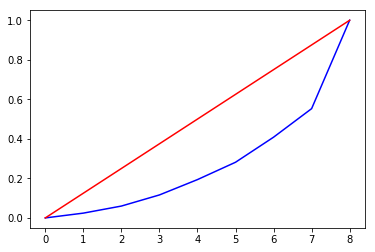

In [25]:
# 0 through length
x = range(len(n_usg_k)+1)
# Cumulative sum
y1 = np.cumsum([0] + n_usg_k)
# y=x line
y2 = [float(t)/(len(x)-1) for t in x]
plt.plot(x, y1, c='b')
plt.plot(x, y2, c='r')
plt.show()

In [27]:
gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(n_usg_k)/(len(n_usg_k)-1)
gini

0.53225308931772042

In [28]:
season_df = pd.read_excel('data/season_data/season_data_2017.xlsx')
team = 'CLE'
team_df = season_df[season_df['team'] == team]
usg = calculate_usg_n(team_df, 2)
n_usg = get_norm_usg(usg)
n_usg_k = get_norm_top_k(n_usg, 8)
x = range(len(n_usg_k)+1)
y1 = np.cumsum([0] + n_usg_k)
y2 = [float(t)/(len(x)-1) for t in x]
gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(n_usg_k)/(len(n_usg_k)-1)
gini

0.48921512599193334

In [33]:
def get_gini_season(season_df, team, k, n):
    team_df = season_df[season_df['team'] == team]
    usg = calculate_usg_n(team_df, n=n)
    n_usg = get_norm_usg(usg)
    n_usg_k = get_norm_top_k(n_usg, k=k)
    x = range(len(n_usg_k)+1)
    y1 = np.cumsum([0] + n_usg_k)
    y2 = [float(t)/(len(x)-1) for t in x]
    gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(n_usg_k)/(len(n_usg_k)-1)
    return gini

In [56]:
def plot_gini_season(yr, team, k, n):
    season_df = pd.read_excel('data/season_data/season_data_' + str(yr) + '.xlsx')
    season_df = season_df[season_df['mp'] != 0]
    
    team_df = season_df[season_df['team'] == team]
    usg = calculate_usg_n(team_df, n)
    n_usg = get_norm_usg(usg)
    n_usg_k = get_norm_top_k(n_usg, k)
    x = range(len(n_usg_k)+1)
    y1 = np.cumsum([0] + n_usg_k)
    y2 = [float(t)/(len(x)-1) for t in x]
    gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(n_usg_k)/(len(n_usg_k)-1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)

    ax.set_xlabel('Player')
    ax.set_ylabel('Cumulative weighted usage')

    ax.text(1.5, 0.5, 'Gini: '+ str(round(gini,3)), fontsize=12)
    
    ax.plot(x, y1, c='black')
    ax.plot(x, y2, c='black')
    ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='orange', interpolate=True)
    ax.set_title('Team: ' + team + ', Season: ' + str(yr))
    plt.show()

In [57]:
season_df = pd.read_excel('data/season_data/season_data_2013.xlsx')
season_df = season_df[season_df['mp'] != 0]
get_gini_season(season_df, 'BRK', k=8, n=2)

0.41063347119382987

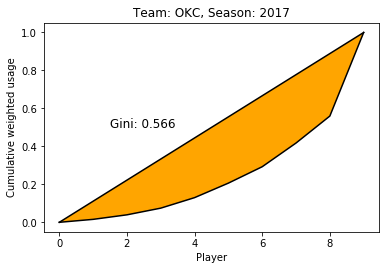

In [58]:
plot_gini_season(2017, 'OKC', k=9, n=2)

In [314]:
sas = season_df[season_df['team'] == 'BRK']
sas

,G,GS,age,ast,blk,drb,efg,fg,fg2,fg2_pct,...,orb,pf,player,pos,pts,stl,team,tov,trb,yr
58,82,8,26,85,54,256,0.514,346,343,0.524,...,161,163,Andray Blatche,C,843,86,BRK,123,417,2013
60,74,23,32,76,4,104,0.528,108,24,0.615,...,16,108,Keith Bogans,SG,311,28,BRK,49,120,2013
75,73,2,24,76,16,72,0.485,155,140,0.500,...,32,93,MarShon Brooks,SG,394,34,BRK,69,104,2013
95,14,0,29,5,2,9,0.310,6,5,0.278,...,6,3,Josh Childress,SF,14,2,BRK,0,15,2013
156,80,56,32,43,13,628,0.479,125,125,0.479,...,260,199,Reggie Evans,PF,363,74,BRK,111,888,2013
243,65,21,27,32,33,239,0.448,139,139,0.451,...,126,127,Kris Humphries,PF,375,16,BRK,57,365,2013
253,2,0,25,0,0,1,NaN,0,0,NaN,...,0,0,Damion James,SF,0,0,BRK,0,1,2013
271,72,72,31,253,14,165,0.493,445,297,0.452,...,53,99,Joe Johnson,SG,1170,49,BRK,123,218,2013
289,4,0,24,0,0,2,0.000,0,0,0.000,...,0,1,Kris Joseph,SF,2,3,BRK,0,2,2013
321,74,74,24,70,154,304,0.521,570,570,0.522,...,208,152,Brook Lopez,C,1437,33,BRK,131,512,2013


In [383]:
links = ['data/season_data/season_data_' + str(yr) + '.xlsx' for yr in range(1986, 2018)]
season_df = pd.read_excel(links[-1])

In [384]:
teams = np.unique(season_df['team'])
teams = teams[teams != 'TOT']

In [385]:
teams

array([u'ATL', u'BOS', u'BRK', u'CHI', u'CHO', u'CLE', u'DAL', u'DEN',
       u'DET', u'GSW', u'HOU', u'IND', u'LAC', u'LAL', u'MEM', u'MIA',
       u'MIL', u'MIN', u'NOP', u'NYK', u'OKC', u'ORL', u'PHI', u'PHO',
       u'POR', u'SAC', u'SAS', u'TOR', u'UTA', u'WAS'], dtype=object)

In [392]:
season_ginis = pd.DataFrame()
for link in links:
    yr = int(link[29:33])
    season_df = pd.read_excel(link)
    teams = np.unique(season_df['team'])
    teams = teams[teams != 'TOT']
    for team in teams:
        for n in range(1,5):
            print team, yr, n
            gini_2 = get_gini_season(season_df, team, k=2, n=n)
            gini_3 = get_gini_season(season_df, team, k=3, n=n)
            gini_4 = get_gini_season(season_df, team, k=4, n=n)
            gini_5 = get_gini_season(season_df, team, k=5, n=n)
            gini_6 = get_gini_season(season_df, team, k=6, n=n)
            gini_7 = get_gini_season(season_df, team, k=7, n=n)
            gini_8 = get_gini_season(season_df, team, k=8, n=n)
            gini_9 = get_gini_season(season_df, team, k=9, n=n)
            gini_10 = get_gini_season(season_df, team, k=10, n=n)
            season_ginis = season_ginis.append({'team': team,
                                                'season': yr,
                                                'gini_2': gini_2,
                                                'gini_3': gini_3,
                                                'gini_4': gini_4,
                                                'gini_5': gini_5,
                                                'gini_6': gini_6,
                                                'gini_7': gini_7,
                                                'gini_8': gini_8,
                                                'gini_9': gini_9,
                                                'gini_10': gini_10,
                                                'mp_power': n
                                               }, 
                                               ignore_index=True)
season_ginis.to_excel('data/season_ginis/ginis_all_mps.xlsx')

ATL 1986 1
ATL 1986 2
ATL 1986 3
ATL 1986 4
BOS 1986 1
BOS 1986 2
BOS 1986 3
BOS 1986 4
CHI 1986 1
CHI 1986 2
CHI 1986 3
CHI 1986 4
CLE 1986 1
CLE 1986 2
CLE 1986 3
CLE 1986 4
DAL 1986 1
DAL 1986 2
DAL 1986 3
DAL 1986 4
DEN 1986 1
DEN 1986 2
DEN 1986 3
DEN 1986 4
DET 1986 1
DET 1986 2
DET 1986 3
DET 1986 4
GSW 1986 1
GSW 1986 2
GSW 1986 3
GSW 1986 4
HOU 1986 1
HOU 1986 2
HOU 1986 3
HOU 1986 4
IND 1986 1
IND 1986 2
IND 1986 3
IND 1986 4
LAC 1986 1
LAC 1986 2
LAC 1986 3
LAC 1986 4
LAL 1986 1
LAL 1986 2
LAL 1986 3
LAL 1986 4
MIL 1986 1
MIL 1986 2
MIL 1986 3
MIL 1986 4
NJN 1986 1
NJN 1986 2
NJN 1986 3
NJN 1986 4
NYK 1986 1
NYK 1986 2
NYK 1986 3
NYK 1986 4
PHI 1986 1
PHI 1986 2
PHI 1986 3
PHI 1986 4
PHO 1986 1
PHO 1986 2
PHO 1986 3
PHO 1986 4
POR 1986 1
POR 1986 2
POR 1986 3
POR 1986 4
SAC 1986 1
SAC 1986 2
SAC 1986 3
SAC 1986 4
SAS 1986 1
SAS 1986 2
SAS 1986 3
SAS 1986 4
SEA 1986 1
SEA 1986 2
SEA 1986 3
SEA 1986 4
UTA 1986 1
UTA 1986 2
UTA 1986 3
UTA 1986 4
WSB 1986 1
WSB 1986 2
WSB 1986 3

In [318]:
#season_ginis.to_excel('data/gini_test.xlsx')

## Match up ginis with wins/playoff results

In [404]:
s_res = pd.read_excel('data/nba_results.xlsx')

In [405]:
season_ginis = pd.read_excel('data/season_ginis/ginis_all_mps.xlsx')

In [406]:
season_ginis_mp1 = season_ginis[season_ginis['mp_power'] == 1]
season_ginis_mp2 = season_ginis[season_ginis['mp_power'] == 2]
season_ginis_mp3 = season_ginis[season_ginis['mp_power'] == 3]
season_ginis_mp4 = season_ginis[season_ginis['mp_power'] == 4]

In [407]:
len(s_res) == len(season_ginis_mp1)

True

In [420]:
var = 'gini_5'
temp = season_ginis_mp2[(season_ginis_mp2['team'] == 'BOS') & (season_ginis_mp2['season'] == 2017)]
temp[var].values[0]

0.26696502975435599

In [415]:
gini_lst = []
for i in range(len(s_res)):
    #print i
    temp = season_ginis_mp2[(season_ginis_mp2['team'] == str(s_res.iloc[i].abbr)) & (season_ginis_mp2['season'] == s_res.iloc[i].yr)]
    #print temp
    gini_lst.append(temp['gini_5'].values[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [416]:
s_res['gini'] = gini_lst

In [417]:
split = 2002
s_res_recent = s_res[s_res['yr'] >= split]
s_res_past = s_res[s_res['yr'] < split]

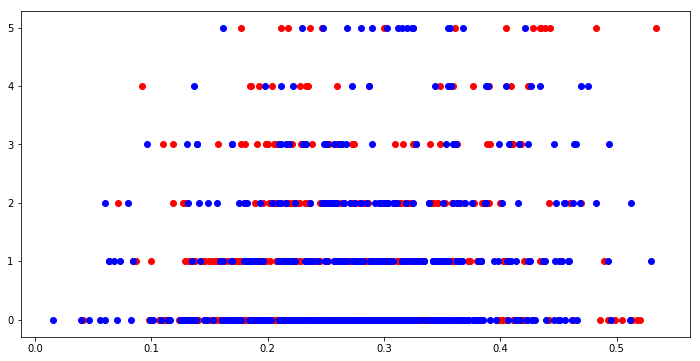

In [418]:
plt.figure(figsize=(12,6))
plt.scatter(s_res_past['gini'], s_res_past['playoffs'], c='r')
plt.scatter(s_res_recent['gini'], s_res_recent['playoffs'], c='b')
plt.show()

In [447]:
def plot_gini(k, n):
    var = 'gini_' + str(k)
    s_res = pd.read_excel('data/nba_results.xlsx')
    season_ginis = pd.read_excel('data/season_ginis/ginis_all_mps.xlsx')
    season_ginis_mp = season_ginis[season_ginis['mp_power'] == n]
    gini_lst = []
    for i in range(len(s_res)):
        #print i
        temp = season_ginis_mp[(season_ginis_mp['team'] == str(s_res.iloc[i].abbr)) & (season_ginis_mp['season'] == s_res.iloc[i].yr)]
        #print temp
        gini_lst.append(temp[var].values[0])
    s_res['gini'] = gini_lst
    
    split = 2003
    s_res_recent = s_res[s_res['yr'] >= split]
    s_res_past = s_res[s_res['yr'] < split]
    plt.figure(figsize=(10,5))
    #plt.scatter(s_res_past['gini'], s_res_past['playoffs'], c='r')
    plt.scatter(s_res_recent['gini'], s_res_recent['playoffs'], c='b')
    plt.title('k=' + str(k) + ', n=' + str(n))
    plt.show()

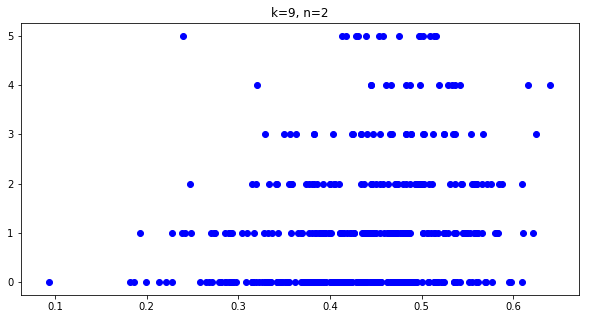

In [450]:
plot_gini(k=9, n=2)

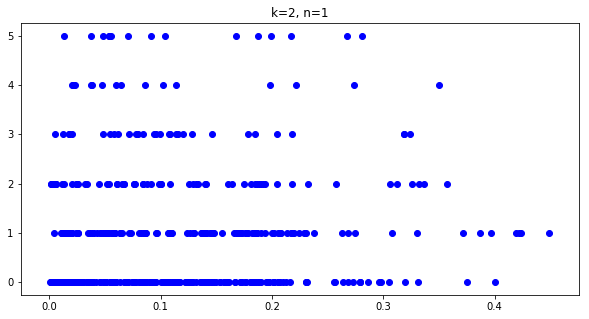

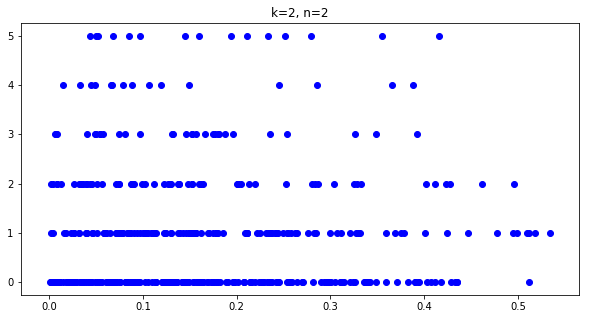

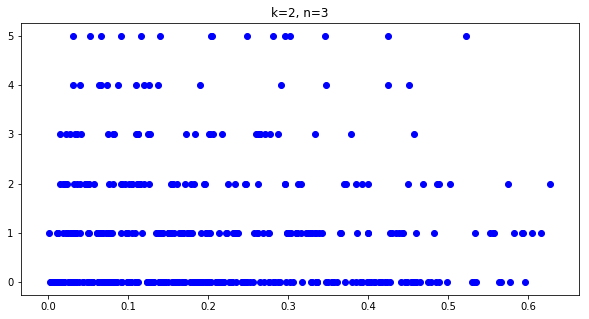

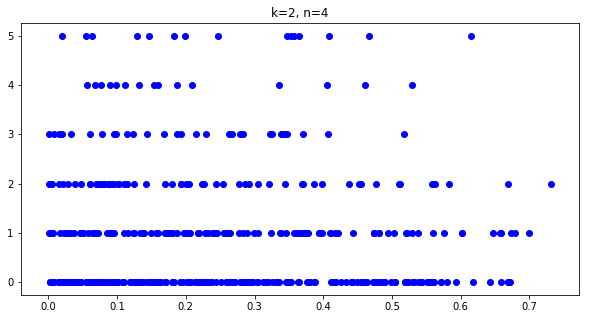

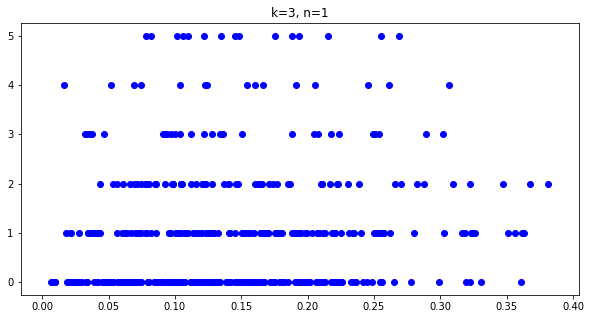

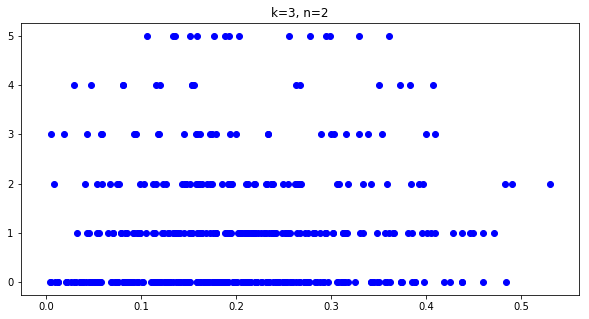

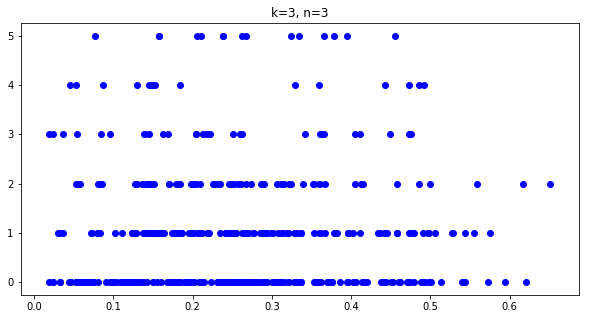

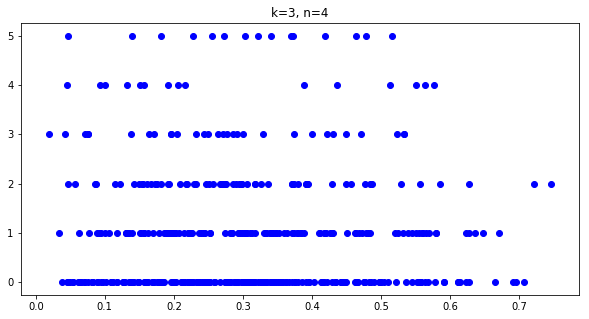

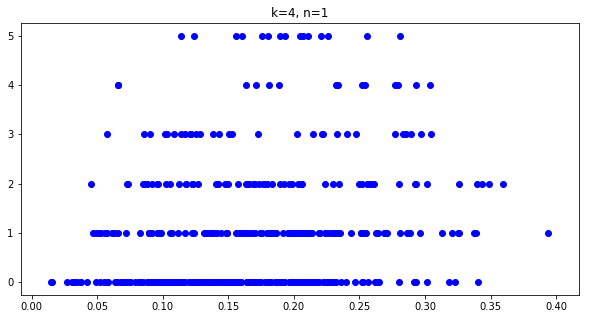

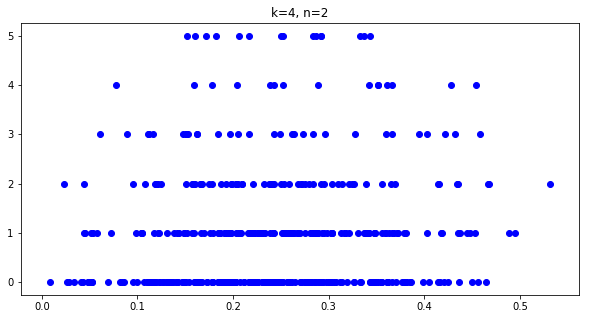

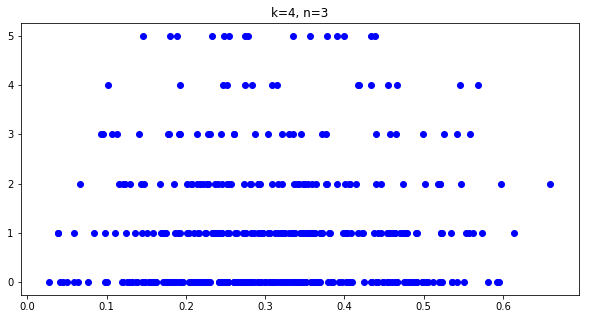

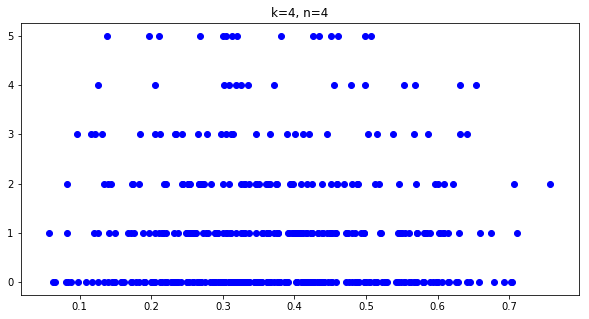

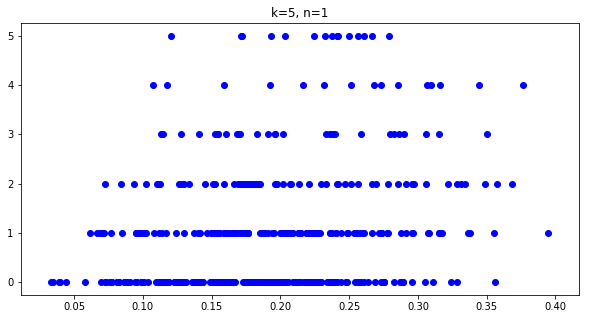

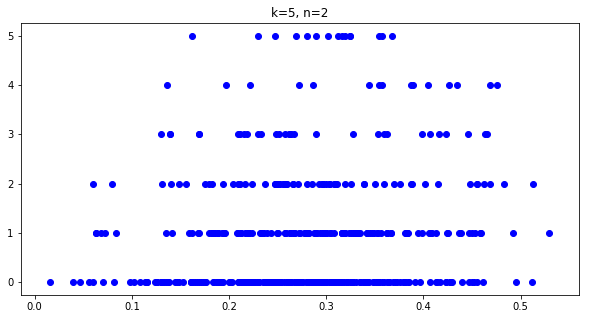

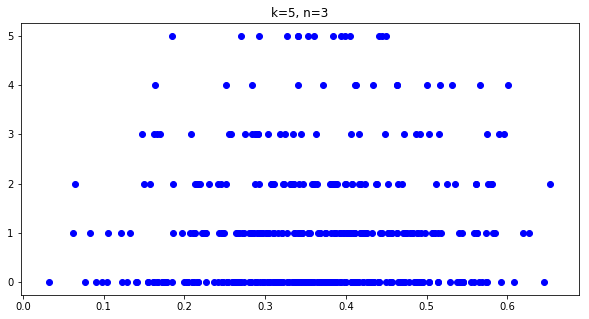

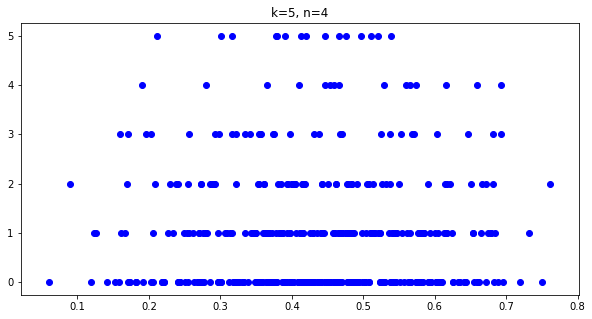

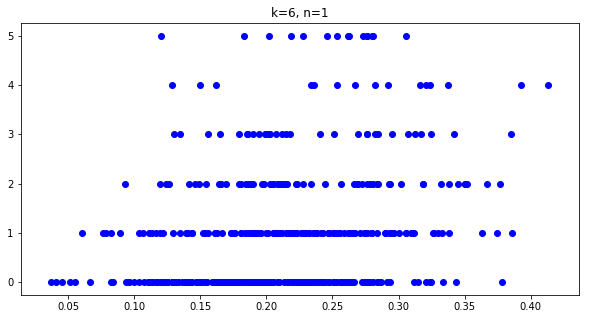

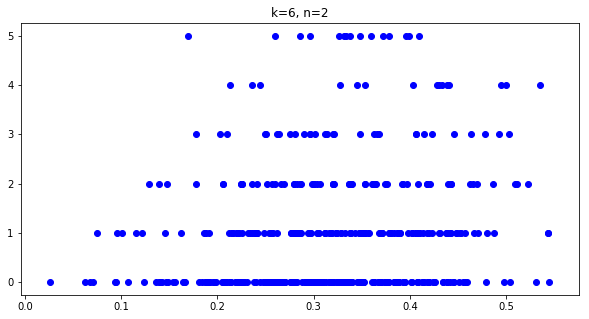

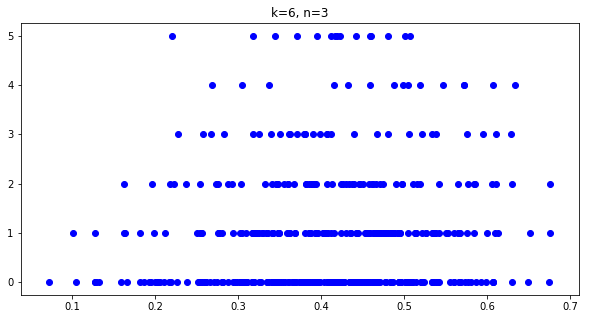

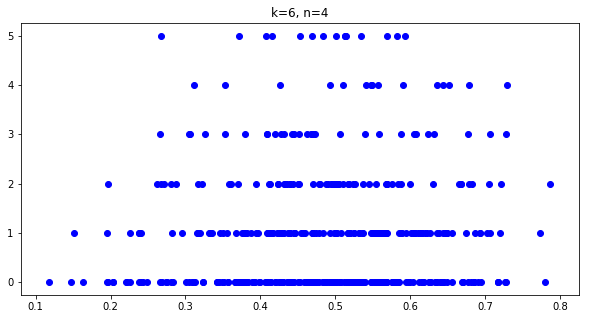

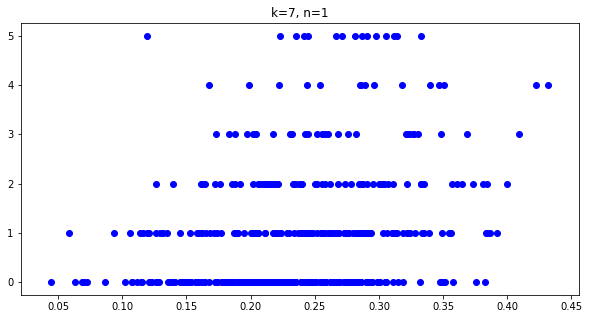

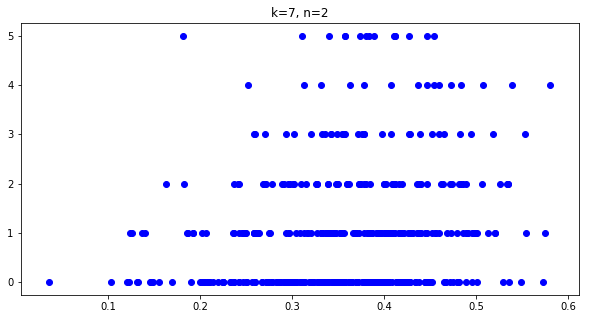

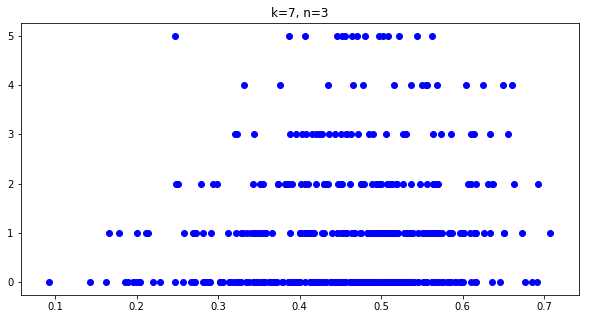

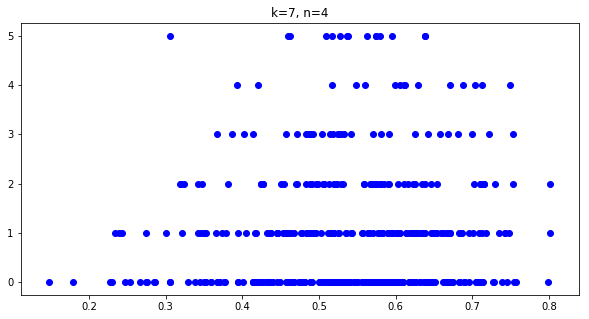

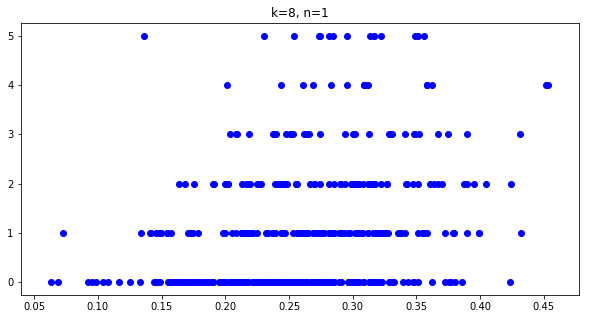

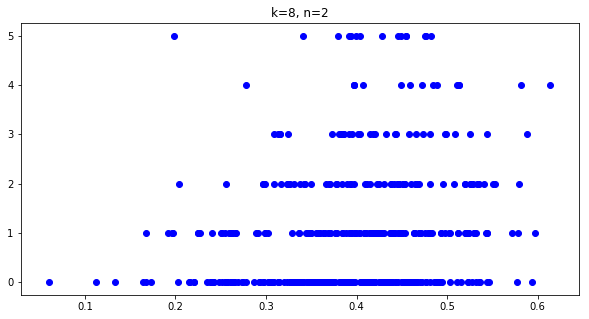

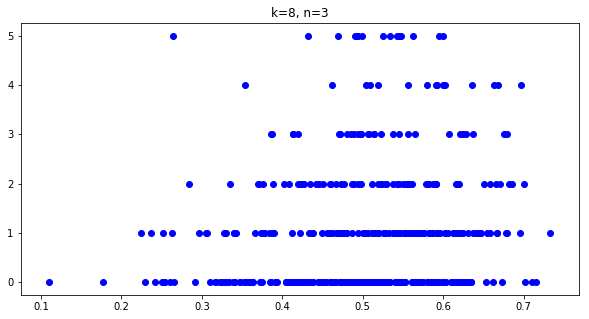

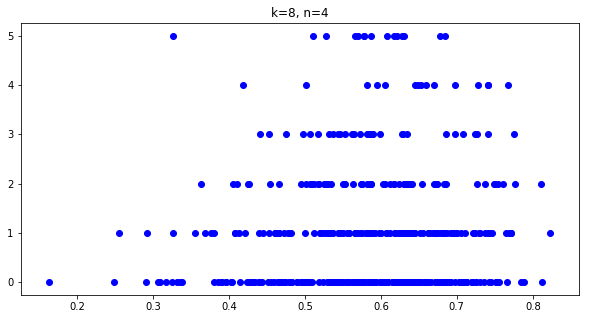

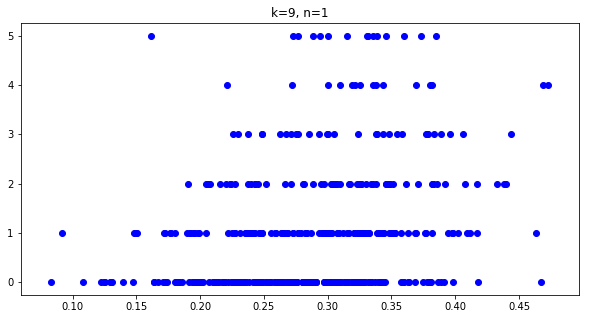

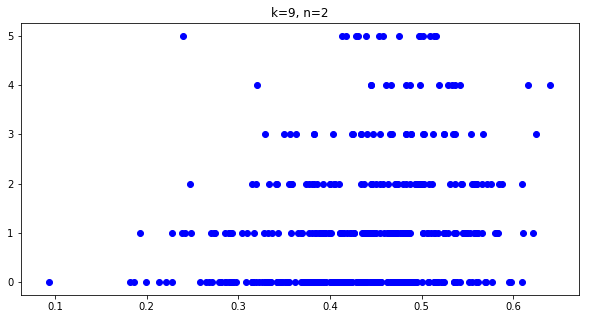

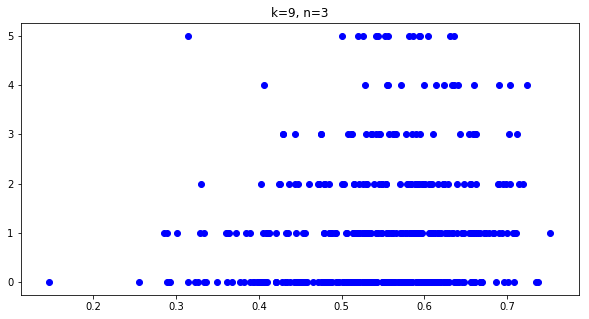

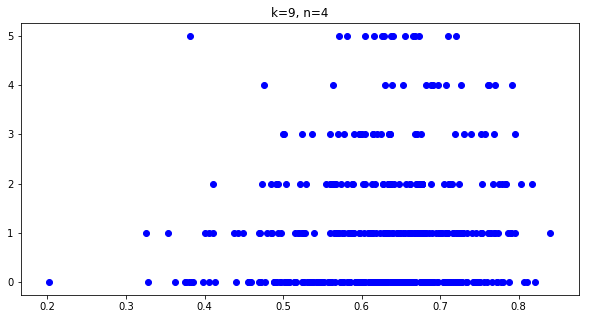

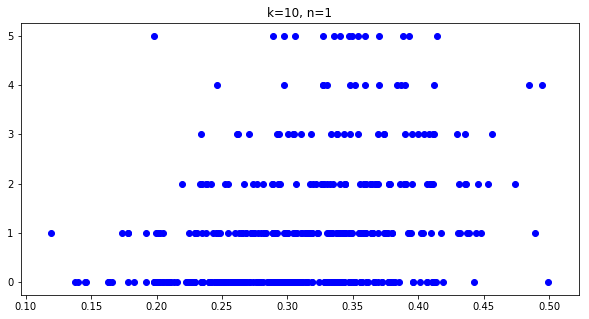

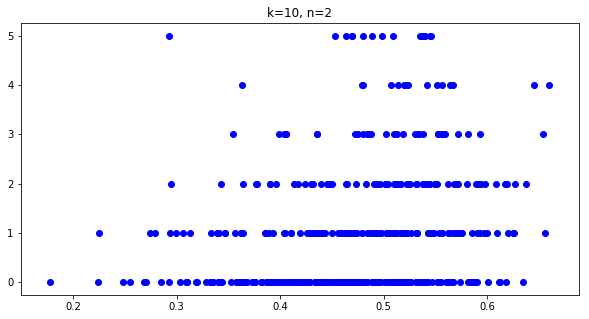

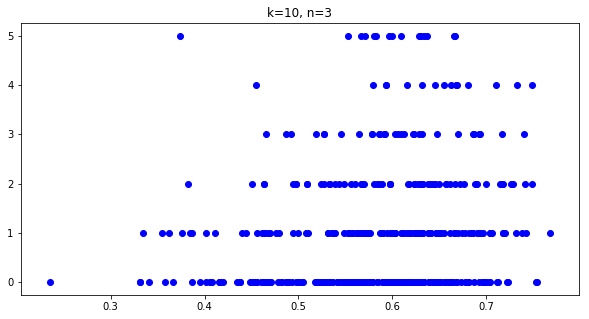

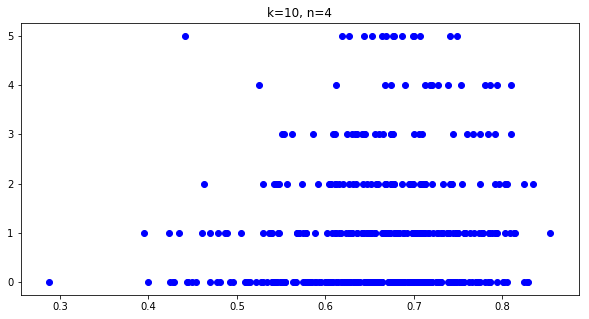

In [449]:
for k in range(2,11):
    for n in range(1,5):
        plot_gini(k, n)